In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [38]:
# adams
def adams(grad, init, n_epochs=5000, eta=10**-4, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma**(j+1))
        grad_sq_hat=grad_sq/(1-beta**(j+1))
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj

In [3]:
def plot_surface(x, y, z, azim=-60, elev=40, dist=10, cmap="RdYlBu_r"):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plot_args = {'rstride': 1, 'cstride': 1, 'cmap':cmap,
             'linewidth': 20, 'antialiased': True,
             'vmin': -2, 'vmax': 2}
    ax.plot_surface(x, y, z, **plot_args)
    ax.view_init(azim=azim, elev=elev)
    ax.dist=dist        
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("z", fontsize=18)
    return fig, ax

In [4]:
# Define surface
def surface(x,y,a=1,b=1):
    return a*x**2+b*y**2

def gradsurface(params,a=1,b=1):
    x=params[0]
    y=params[1]
    grad_x= 2*a*x
    grad_y= 2*b*y
    return [grad_x,grad_y]

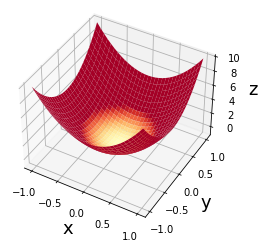

In [5]:
x, y = np.mgrid[-1:1:31j, -1:1:31j]
fig1,ax1=plot_surface(x,y,surface(x,y, 5, 5))
ax1.set_zlim(-1, 10)
plt.show()

In [34]:
def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.scatter(xs,ys)#, color, label=label,lw=lw)
    ax.plot(xs[-1], ys[-1], 'r*', markersize=10)
    conv_point = [xs[-1], ys[-1]]
    i = 0
    for x,y in zip(xs,ys):
        if (i%5==0):
            plt.text(x, y, str(i))
        
        i = i+1
    return ax, conv_point

In [28]:
def contour_function(f, x, y):
    #plot beales function
    fig, ax = plt.subplots(figsize=(10, 6))
    z=f(x,y)
    cax = ax.contour(x, y, z, levels=10)#, cmap="RdYlBu_r")

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    #ax.set_xlim((-4.5, 4.5))
    #ax.set_ylim((-4.5, 4.5))
    
    return fig,ax

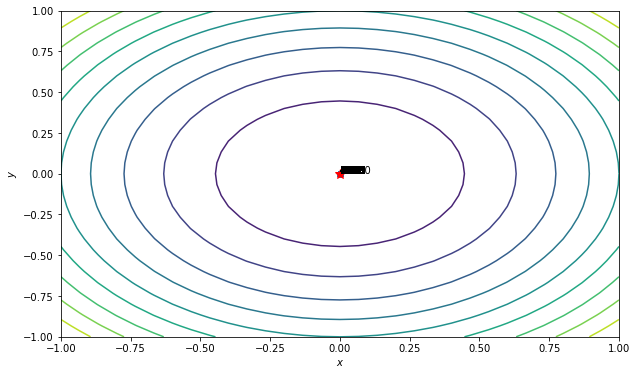

In [45]:
Nsteps=10**4
lr_l=10**-1

#fig1,ax1=plot_surface(x,y,surface(x,y, 5, 5))
fig, ax = contour_function(surface, x, y)
ax1.set_zlim(-1, 10)

adam_trajectory1=adams(gradsurface,[0,0],Nsteps,eta=lr_l, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0)

overlay_trajectory_contour(ax,adam_trajectory1,'ADAMS', 'r')
plt.show()

In [ ]:
grid = np.linspace()